# This project is about the sentimental analysis on tweets. Data will be fetched from twitter.

# Import The Libraries

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from textblob import TextBlob
from wordcloud import WordCloud

# Twitter API Credentials

In [2]:
consumerKey = '1eJRcqFAfZrFrmeonazbsPkBb'
consumerSecret = 'aMZaeho6VfqdzitrhjmCjy0ASqyv4aIDRgHEhYwEWVl3v440tP'
accessToken = '1568361038-ZT3NjbYGlp48PDqKdUo7OIRcHDn7bPp1V3xjjFl'
accessSecret = 'LtYXLVFda6dxO4NAOGLHX7AgW7kZtMkmvpdQpmFmHNvv7'

# Authenticate Twitter API with Tweepy

In [3]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken,accessSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit = True)

# Extracting Tweets From Our Honourable PM Twitter Account

In [4]:
#Extract 100 tweets from the twitter User
posts = api.user_timeline(screen_name = "narendramodi",count = 100,lang= "en", tweet_mode = "extended")

#print the last 5 tweets from teh account
print("Show the 5 recent tweets : \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' +  tweet.full_text + '\n')
    i = i + 1

Show the 5 recent tweets : 

1) Our planet’s challenges can be overcome with a collective spirit and human centric approach. https://t.co/Zxlf3v1jPj

2) Here is why India is the ideal destination for start-ups to flourish. https://t.co/u1ZQ7ZybsP

3) Where conventions fail, innovation helps. https://t.co/TM2vHD1TxZ

4) Addressing @VivaTech Summit. https://t.co/AIC6Zkcju5

5) Tomorrow evening will be addressing @VivaTech via video conferencing. Through this forum, will be speaking about India’s strides in the world of tech and start-ups. https://t.co/3Z4zBftiPf



# Creating DataFrame of Tweets

In [5]:
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,Our planet’s challenges can be overcome with a...
1,Here is why India is the ideal destination for...
2,"Where conventions fail, innovation helps. http..."
3,Addressing @VivaTech Summit. https://t.co/AIC6...
4,Tomorrow evening will be addressing @VivaTech ...


# Cleaning The Text

In [6]:
#Creating a function to clean tweets
def cleanTxt(text):
    text = re.sub(r'@[a-zA-Z0-9]+','',text)  #remove @mention
    text = re.sub(r'#','',text)              #remove # Sign
    text = re.sub(r'RT[\s]+','',text)        #remove RT
    text = re.sub(r'https?:\/\/.*[\r\n]*','',text) #remove Links
    
    return text
#Calling Function
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# SHowing Cleaned Data

In [7]:
df.head()

,Tweets
0,Our planet’s challenges can be overcome with a...
1,Here is why India is the ideal destination for...
2,"Where conventions fail, innovation helps."
3,Addressing Summit.
4,Tomorrow evening will be addressing via video...


# Applying Subjectivity

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [8]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

# Applying Polarity

Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive, neagtive or neutral.Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

In [9]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Showing DataFrame with Subjectivity and Polarity

In [10]:
df.head()

,Tweets,Subjectivity,Polarity
0,Our planet’s challenges can be overcome with a...,0.1,0.0
1,Here is why India is the ideal destination for...,1.0,0.9
2,"Where conventions fail, innovation helps.",0.3,-0.5
3,Addressing Summit.,0.0,0.0
4,Tomorrow evening will be addressing via video...,0.0,0.0


# Plotting WordCloud

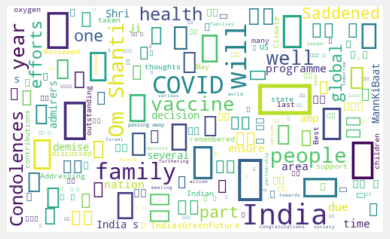

In [17]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300,background_color="white", random_state = 23, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud , interpolation = "bilinear")
plt.axis('off')
plt.show()

# Analyzing The Tweets

In [18]:
#Creating a function to Analyze the tweets on basis of Polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Showing DataFrame

In [20]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Our planet’s challenges can be overcome with a...,0.10,0.0,Neutral
1,Here is why India is the ideal destination for...,1.00,0.9,Positive
2,"Where conventions fail, innovation helps.",0.30,-0.5,Negative
3,Addressing Summit.,0.00,0.0,Neutral
4,Tomorrow evening will be addressing via video...,0.00,0.0,Neutral
...,...,...,...,...
95,कोरोना ने हमसे कई अपनों को छीना है। मैं उन सभी...,0.00,0.0,Neutral
96,Passing away of Shri Sunderlal Bahuguna Ji is ...,0.35,0.3,Positive
97,Reviewing COVID-19 situation in Kashi with doc...,0.00,0.0,Neutral
98,"At 11 AM tomorrow, 21st May, will be interacti...",0.00,0.0,Neutral


# Displaying All Positive Tweets

In [27]:
j =1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j +1

1) Here is why India is the ideal destination for start-ups to flourish. 

2) Best wishes on the auspicious occasion of Raja Parba. I pray for the good health and well-being of everyone.

3) As you complete your successful tenure as the Prime Minister of the State of Israel, I convey my profound gratitude for your leadership and personal attention to India-Israel strategic partnership .

4) Excellency , congratulations on becoming the Prime Minister of Israel. As we celebrate 30 years of the upgradation of diplomatic relations next year, I look forward to meeting you and deepening the strategic partnership between our two countries. 

5) Also participated in the  session on Climate and reiterated India's strong commitment to climate action. India is the only G20 country on track to meet its Paris Commitments. And Indian Railways is committed to "Net Zero" by 2030.

6) Was happy to address the  Session on Open Societies as a Lead Speaker. Democracy and freedom are part of India's civili

# Displaying The Negative Tweets

In [29]:
j =1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j +1

1) Where conventions fail, innovation helps. 

2) Swami Shivamayanandaji Maharaj of the Ramakrishna Math was actively involved in a wide range of community service initiatives focused on social empowerment. His contributions to the worlds of culture and spirituality will always be remembered. Saddened by his demise. Om Shanti.

3) Prof Radhamohan Ji was deeply passionate about agriculture, especially adopting sustainable and organic practices. He was also respected for his knowledge on subjects relating to the economy and ecology. Saddened by his demise. Condolences to his family and admirers. Om Shanti.

4) Anguished by the demise of Shri Buddhadeb Dasgupta. His diverse works struck a chord with all sections of society. He was also an eminent thinker and poet. My thoughts are with his family and several admirers in this time of grief. Om Shanti.

5) My thoughts are with all those who lost their near and dear ones due to lightning in parts of West Bengal. May the injured recover at the

# Plot Polarity and Subjectivity

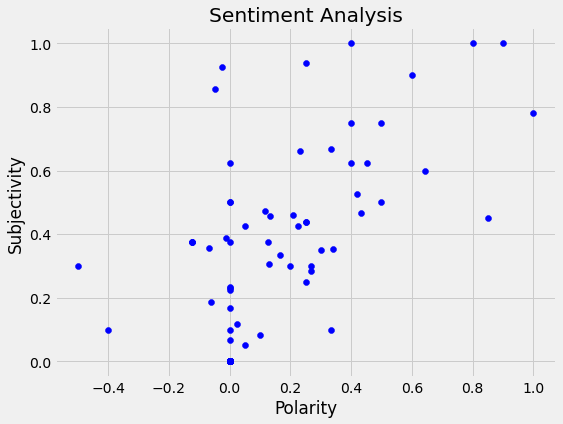

In [31]:
plt.figure(figsize =(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = "Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Getting Percentage of Neutral Tweets

In [33]:
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

53.0

# Getting Percentage of Positive Tweets

In [35]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

37.0

# Getting Percentage of Negative Tweets

In [37]:
netweets = df[df.Analysis == 'Negative']
netweets = netweets['Tweets']

round((netweets.shape[0] / df.shape[0]) * 100, 1)

10.0

# Show the Value Counts

In [38]:
df['Analysis'].value_counts()

Neutral     53
Positive    37
Negative    10
Name: Analysis, dtype: int64

# plot and visualize the counts

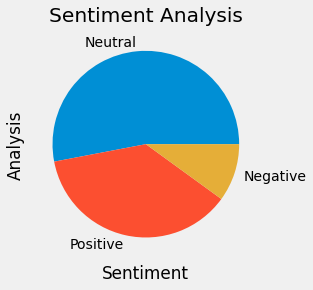

In [42]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()

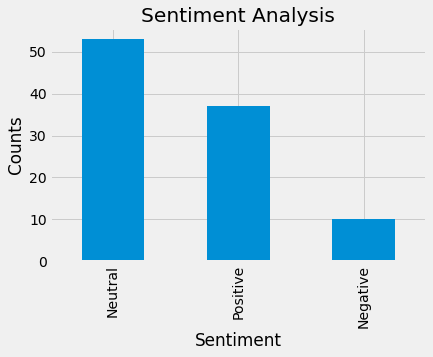

In [43]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()